In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                            GradientBoostingClassifier, StackingClassifier, VotingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read data
df = pd.read_excel('/content/drive/MyDrive/dataset/pone.0191852.s002.xlsx')
#df = pd.read_excel('/content/Copy of pone.0191852.s002(1).xlsx')

In [ ]:
df['Nerve root compression on MRI'].nunique()

2

In [ ]:
df['Nerve root compression on MRI'].value_counts()

,count
Nerve root compression on MRI,
1,231
0,164


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


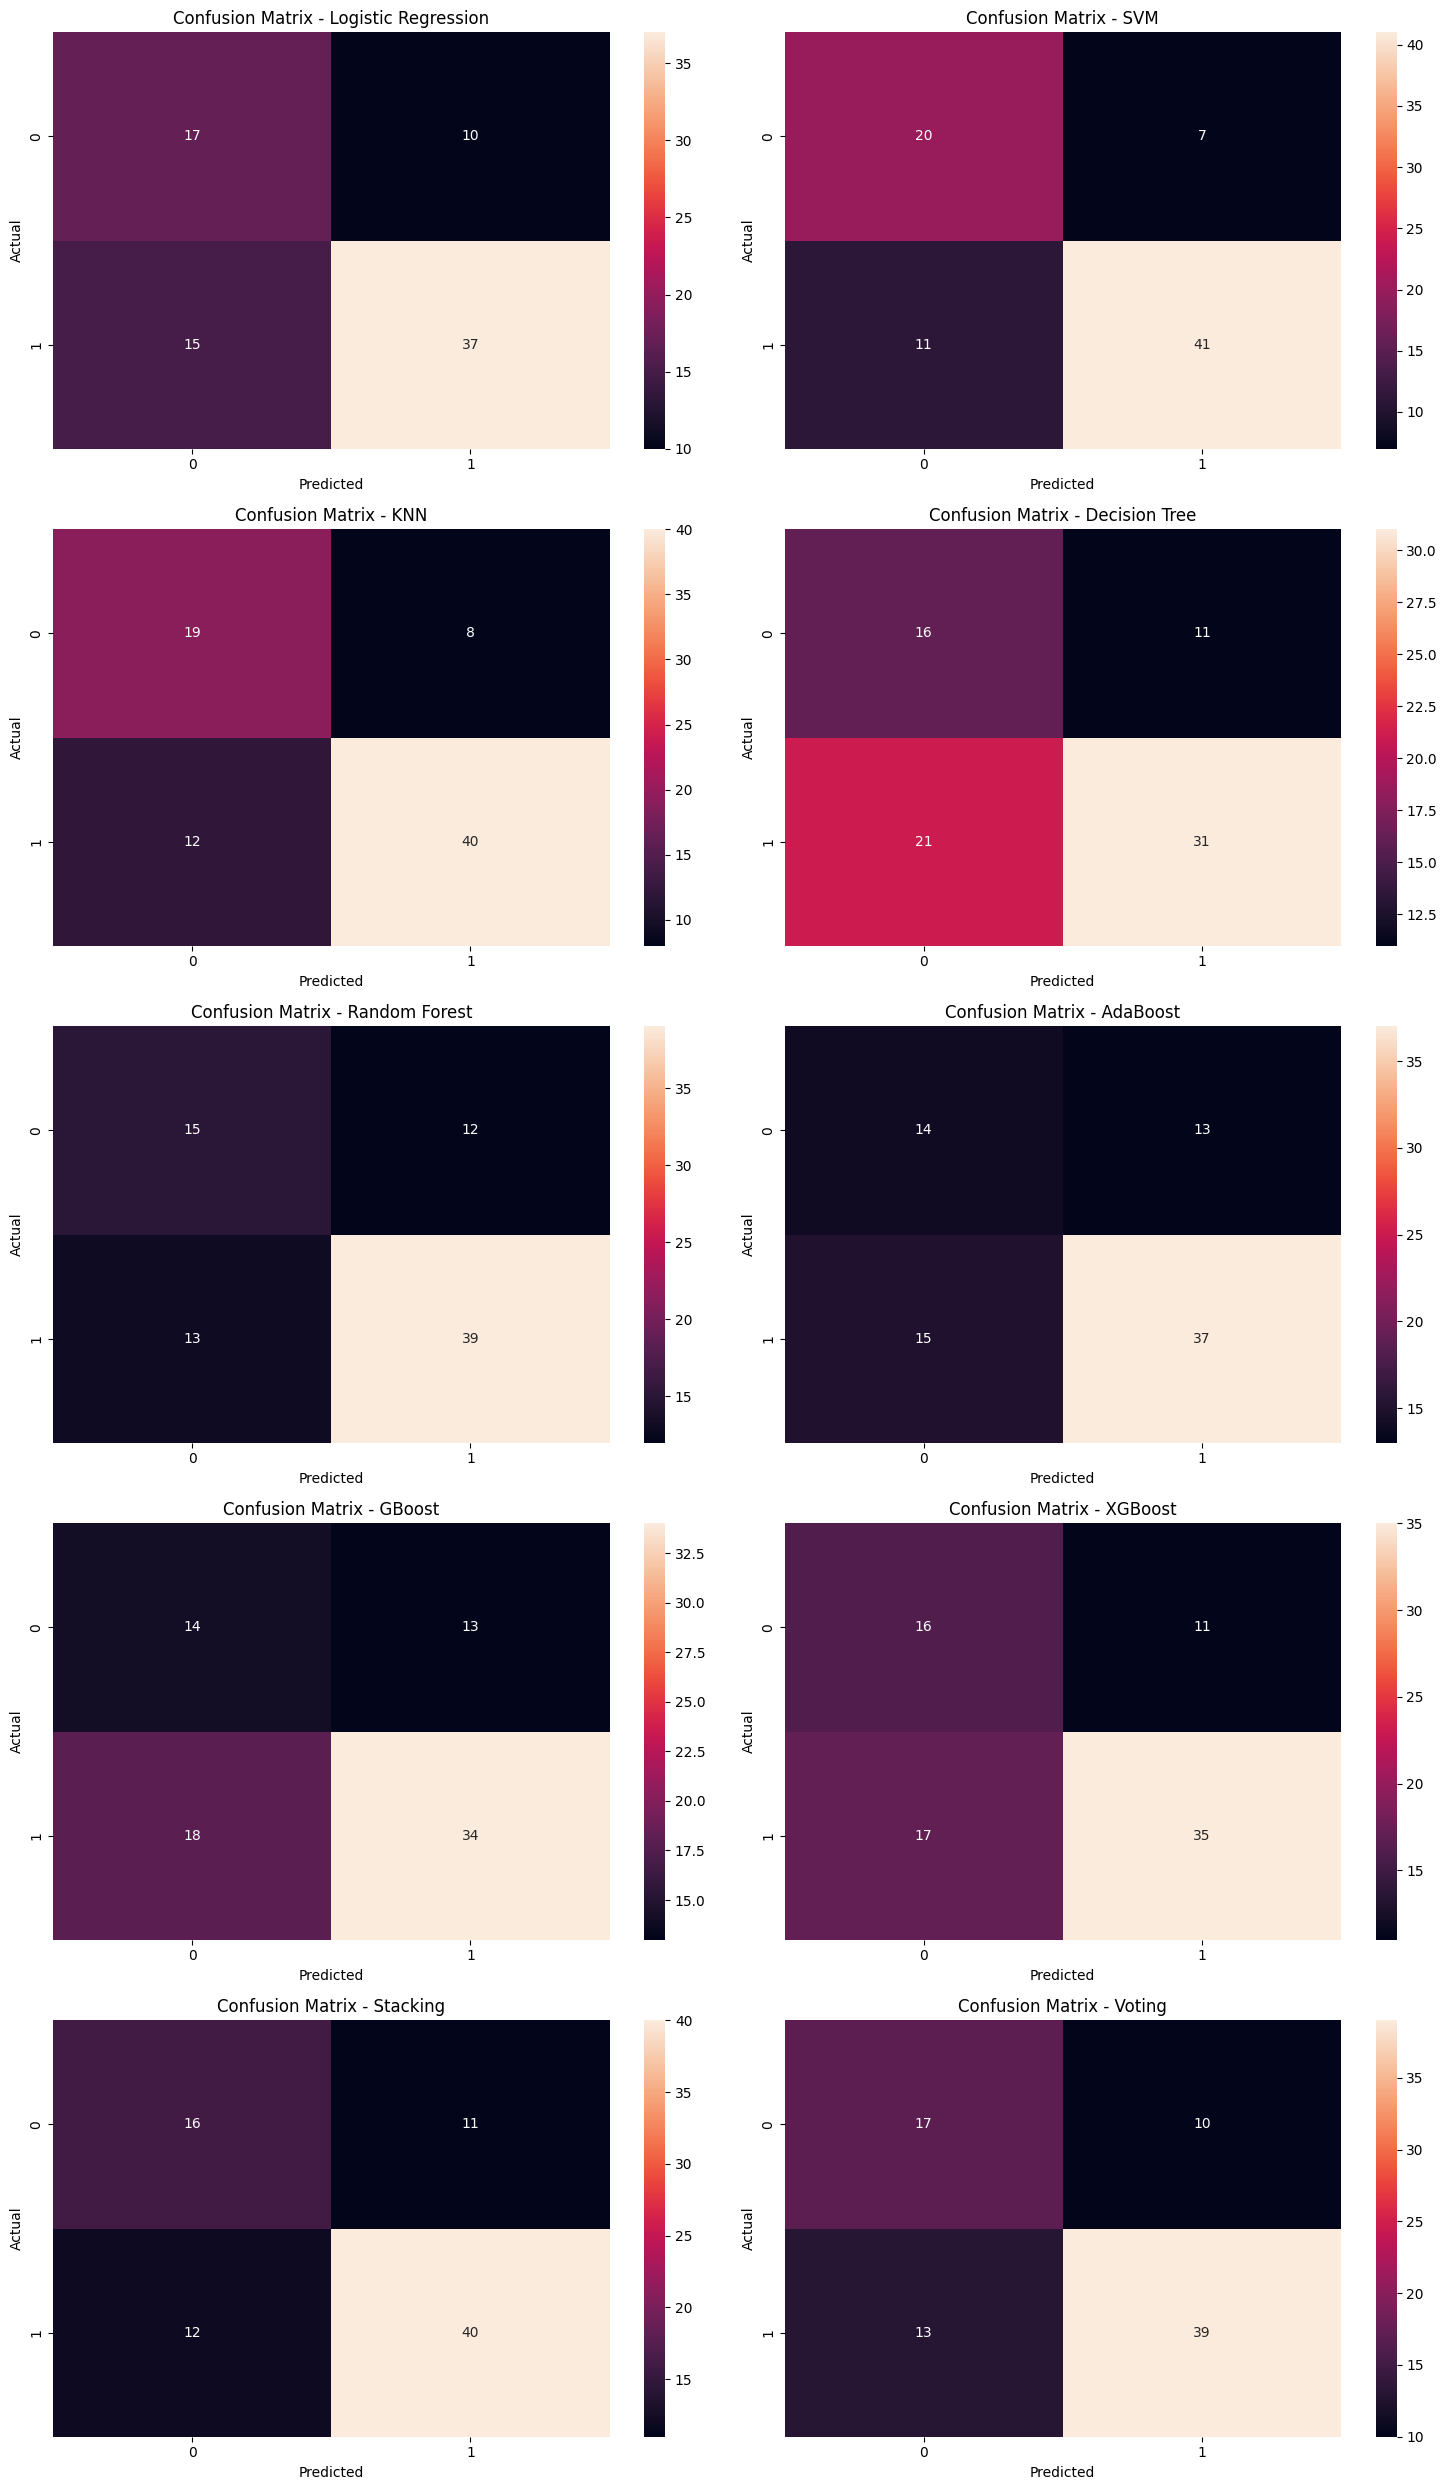


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
1,SVM,0.772,0.854,0.788,0.820
2,KNN,0.747,0.833,0.769,0.800
8,Stacking,0.709,0.784,0.769,0.777
9,Voting,0.709,0.796,0.750,0.772
4,Random Forest,0.684,0.765,0.750,0.757
0,Logistic Regression,0.684,0.787,0.712,0.747
5,AdaBoost,0.646,0.740,0.712,0.725
7,XGBoost,0.646,0.761,0.673,0.714
6,GBoost,0.608,0.723,0.654,0.687
3,Decision Tree,0.595,0.738,0.596,0.660


In [ ]:
# Select specific columns as features
selected_columns = df.columns[[7,8,14,15,16,17,18,20,21,22,24,25]]
X = df[selected_columns]
y = df.iloc[:,4]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GBoost': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize Stacking Classifier
estimators = [
    ('svm', SVC(probability=True, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]
models['Stacking'] = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Initialize Voting Classifier
voting_estimators = [
    ('svm', SVC(probability=True, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier())
]
models['Voting'] = VotingClassifier(estimators=voting_estimators, voting='soft')

# Train and evaluate models
results = []
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Create performance comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)
results_df = results_df.style.format({
    'Accuracy': '{:.3f}',
    'Precision': '{:.3f}',
    'Recall': '{:.3f}',
    'F1-Score': '{:.3f}'
})

print("\nModel Performance Comparison:")
display(results_df)

<ipython-input-10-6989de549103>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-10-6989de549103>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-10-6989de549103>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-10-6989de549103>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


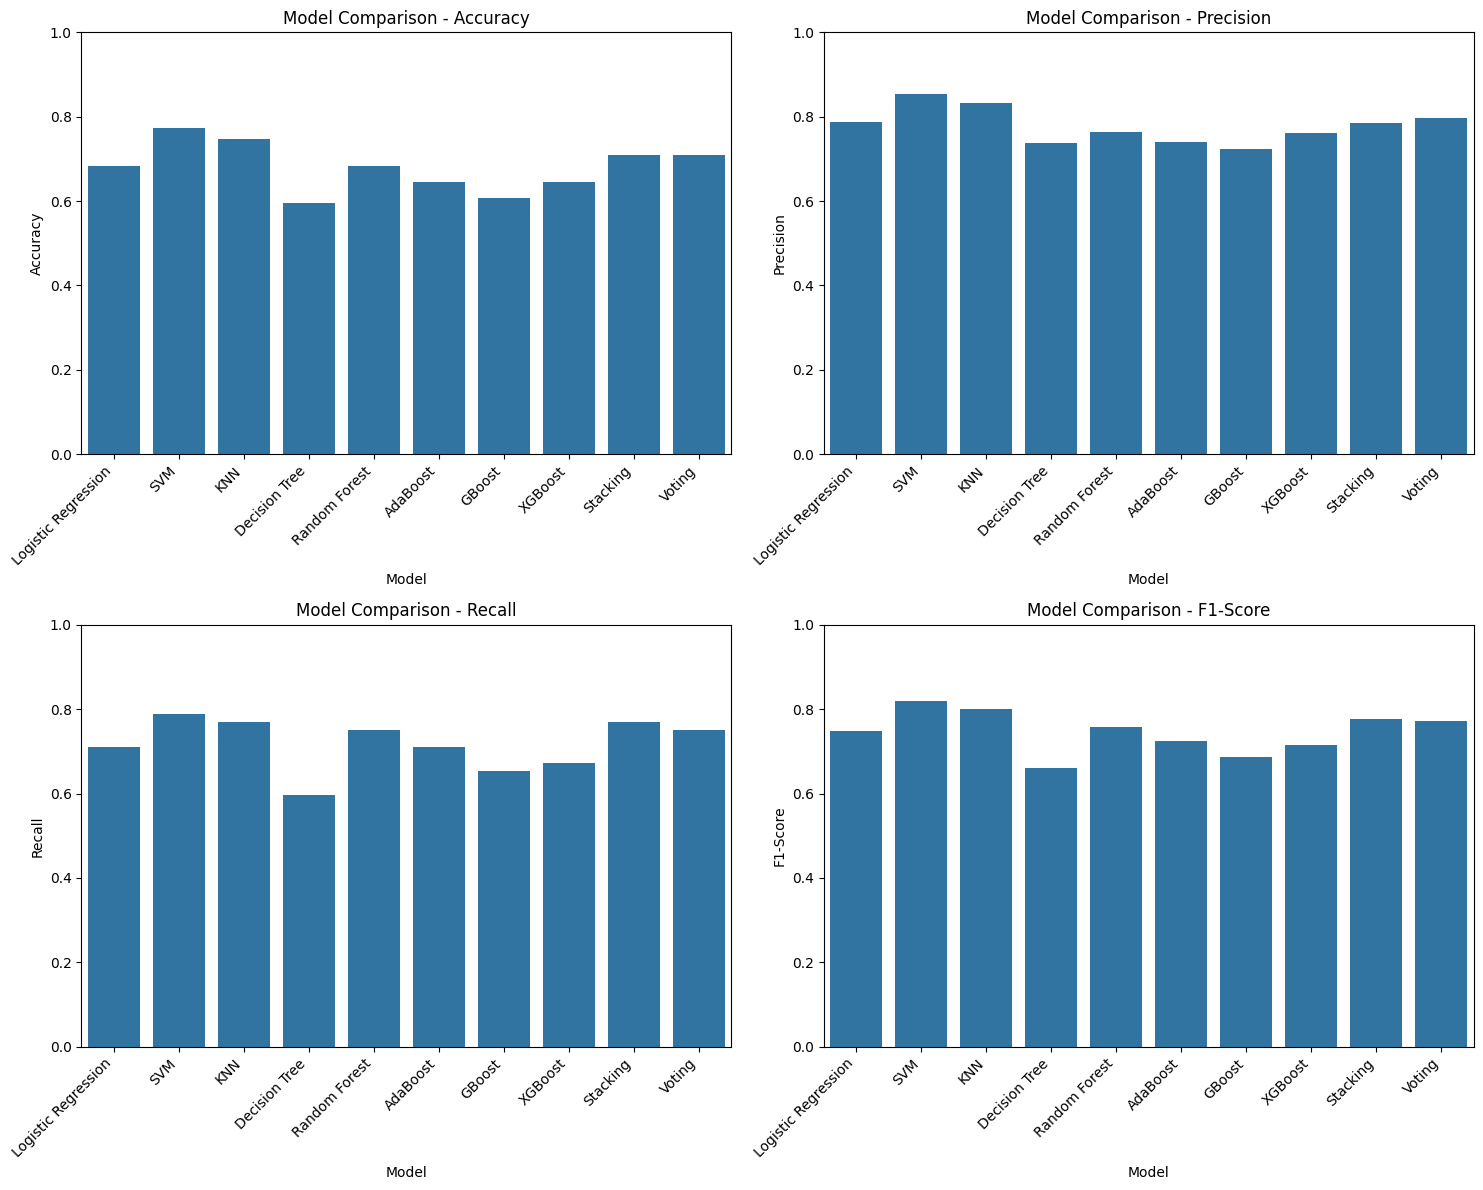

In [ ]:
results_df_plot = pd.DataFrame(results)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, ax) in enumerate(zip(metrics, axes.ravel())):
    sns.barplot(x='Model', y=metric, data=results_df_plot, ax=ax)
    ax.set_title(f'Model Comparison - {metric}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim(0, 1)  # Set y-axis from 0 to 1 for better comparison

plt.tight_layout()
plt.show()

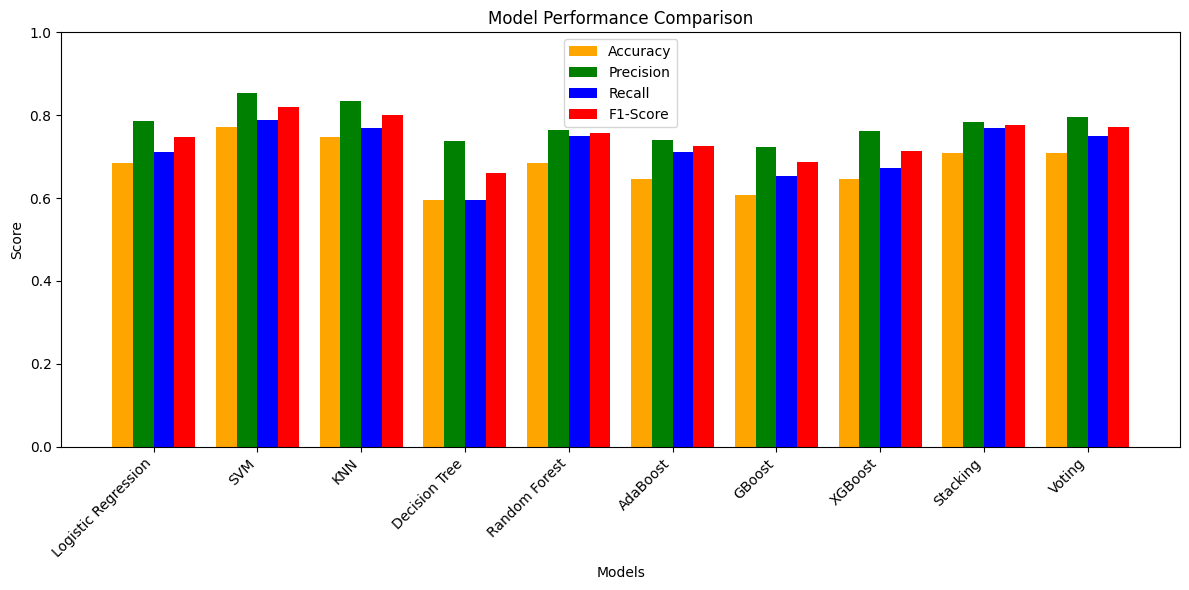

In [ ]:
# Convert styled dataframe back to regular dataframe for plotting
results_df_plot = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
x = np.arange(len(results_df_plot['Model']))
width = 0.2

plt.bar(x - width*1.5, results_df_plot['Accuracy'], width, label='Accuracy', color='orange')
plt.bar(x - width/2, results_df_plot['Precision'], width, label='Precision', color='green')
plt.bar(x + width/2, results_df_plot['Recall'], width, label='Recall', color='blue')
plt.bar(x + width*1.5, results_df_plot['F1-Score'], width, label='F1-Score', color='red')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df_plot['Model'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


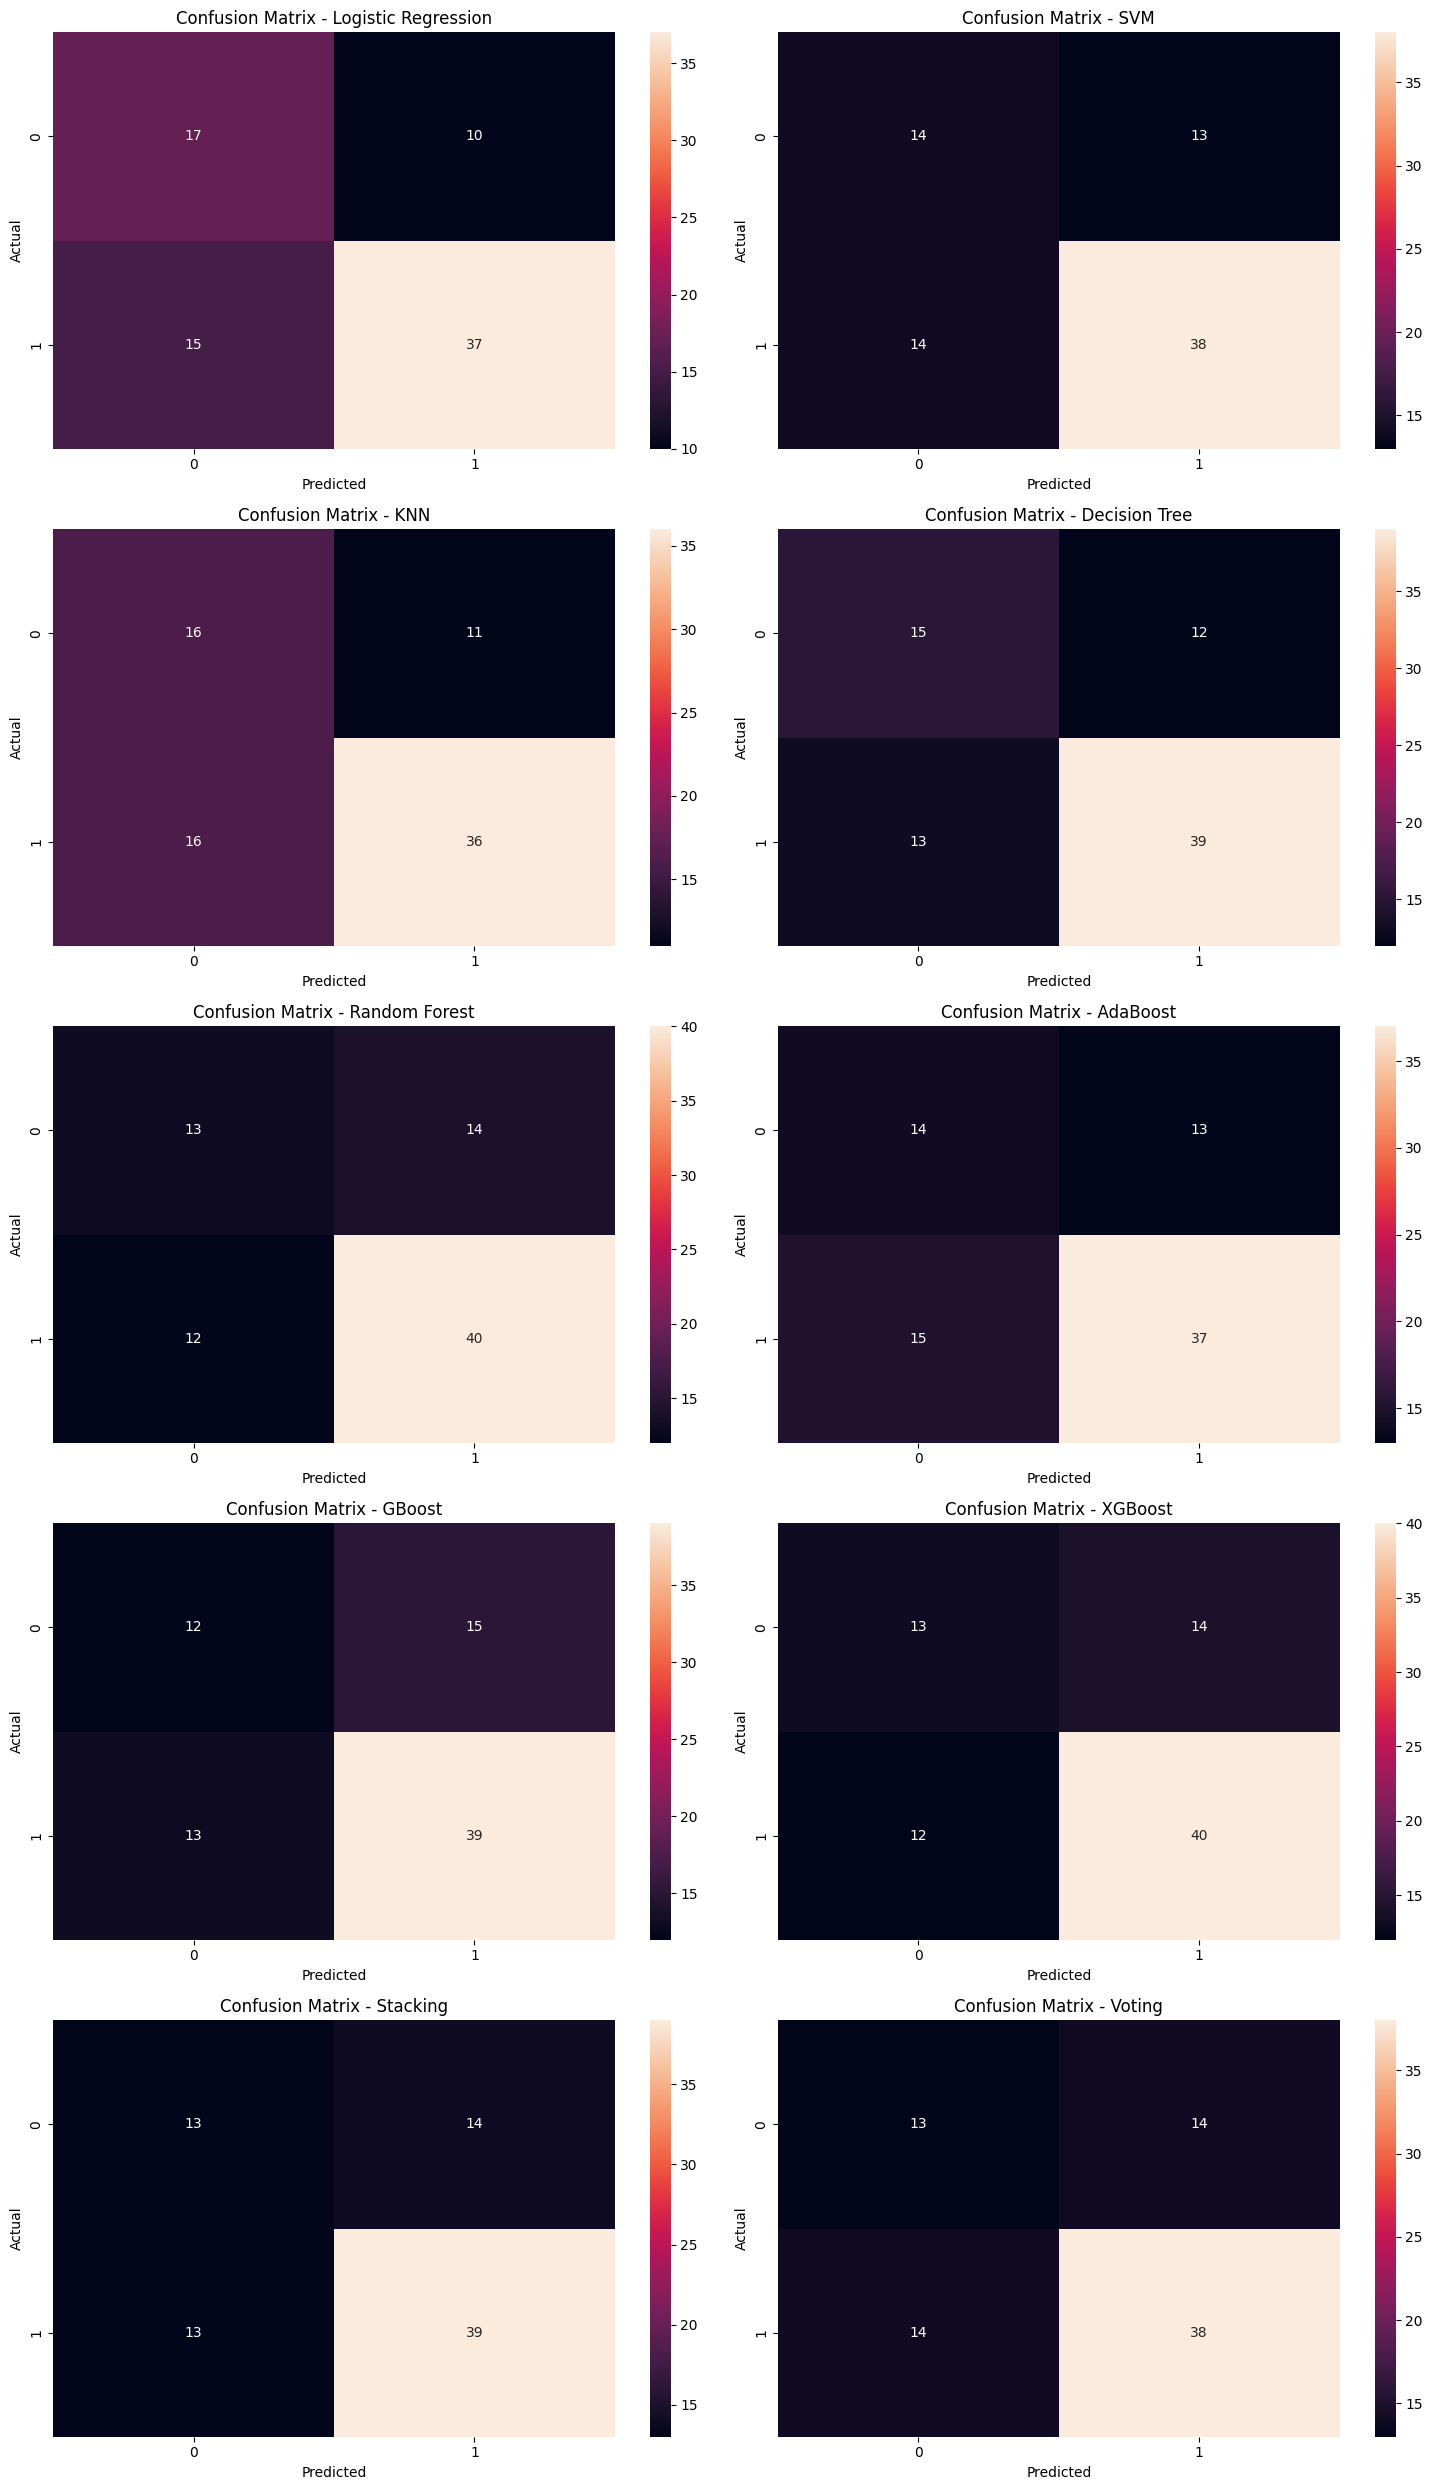


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
3,Decision Tree,0.684,0.765,0.750,0.757
4,Random Forest,0.671,0.741,0.769,0.755
7,XGBoost,0.671,0.741,0.769,0.755
0,Logistic Regression,0.684,0.787,0.712,0.747
8,Stacking,0.658,0.736,0.750,0.743
1,SVM,0.658,0.745,0.731,0.738
6,GBoost,0.646,0.722,0.750,0.736
9,Voting,0.646,0.731,0.731,0.731
2,KNN,0.658,0.766,0.692,0.727
5,AdaBoost,0.646,0.740,0.712,0.725


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                            GradientBoostingClassifier, StackingClassifier, VotingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read data
df = pd.read_excel('/content/drive/MyDrive/dataset/pone.0191852.s002.xlsx')

# Separate features and target
X = df.drop(['Nerve root compression on MRI'], axis=1)
y = df['Nerve root compression on MRI']

# Handle categorical data (Gender)
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GBoost': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Initialize Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]
models['Stacking'] = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Initialize Voting Classifier
voting_estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]
models['Voting'] = VotingClassifier(estimators=voting_estimators, voting='soft')

# Train and evaluate models
results = []
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    # Train model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Create performance comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)
results_df = results_df.style.format({
    'Accuracy': '{:.3f}',
    'Precision': '{:.3f}',
    'Recall': '{:.3f}',
    'F1-Score': '{:.3f}'
})

print("\nModel Performance Comparison:")
display(results_df)